In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
new_directory = '/Users/eduard/Projects/PhD/numunutau/neutrino_ana/'
os.chdir(new_directory)

In [6]:
df = pd.read_csv("data/flux_out.csv")
df

,px,py,pz,E,pdg
0,0.044957,0.158083,65.913484,65.913689,-16
1,0.116578,0.001042,140.318723,140.318771,16
2,-0.068958,0.150524,71.543578,71.543770,-16
3,0.058166,0.606058,460.480860,460.481262,-16
4,-0.137482,0.003001,86.314122,86.314232,16
...,...,...,...,...,...
757,1.145535,-0.220577,1382.622189,1382.622681,16
758,0.196015,0.004887,386.278789,386.278839,-16
759,0.005650,0.014165,49.443639,49.443642,16
760,0.197693,0.298170,267.011449,267.011688,-16


In [7]:
def plot_var_one(df, label = ''):
    fig, ax = plt.subplots(figsize = (8,8), dpi = 100)
    ax.hist(df, bins = np.linspace(0, 3500, 100))
    ax.set_title(f"{label}")
    ax.set_yscale("log")
    fig.savefig(f"nu_{label}.pdf")

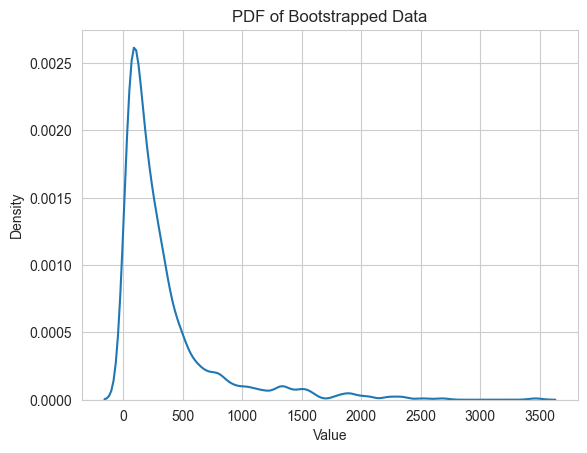

In [29]:
nutau = df["E"].values
#plot_var_one(nutau, 'old_16')


increase_factor = 50
bootstrapped_data = np.random.choice(nutau, size=len(nutau) * increase_factor, replace=True)
threshold = 1000  # Example threshold, change as needed
tail_indices = np.where(bootstrapped_data > threshold)[0]

# Add random noise to smear the spikes
#noise = np.random.normal(loc=0, scale=50, size=len(tail_indices))  # Adjust the scale of noise as needed
bootstrapped_data[tail_indices] = np.random.normal(bootstrapped_data[tail_indices], np.sqrt(bootstrapped_data[tail_indices]), size=len(tail_indices))
bootstrapped_data = np.array(bootstrapped_data)
#plot_var_one(bootstrapped_data, 'new_16')

sns.kdeplot(x = nutau, bw_adjust=0.5)
plt.title('PDF of Bootstrapped Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.savefig("pdf.pdf")

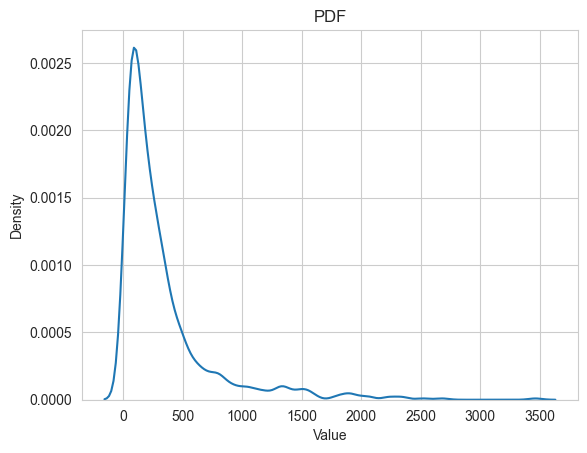

Text(0.5, 0, 'Energy [GeV]')

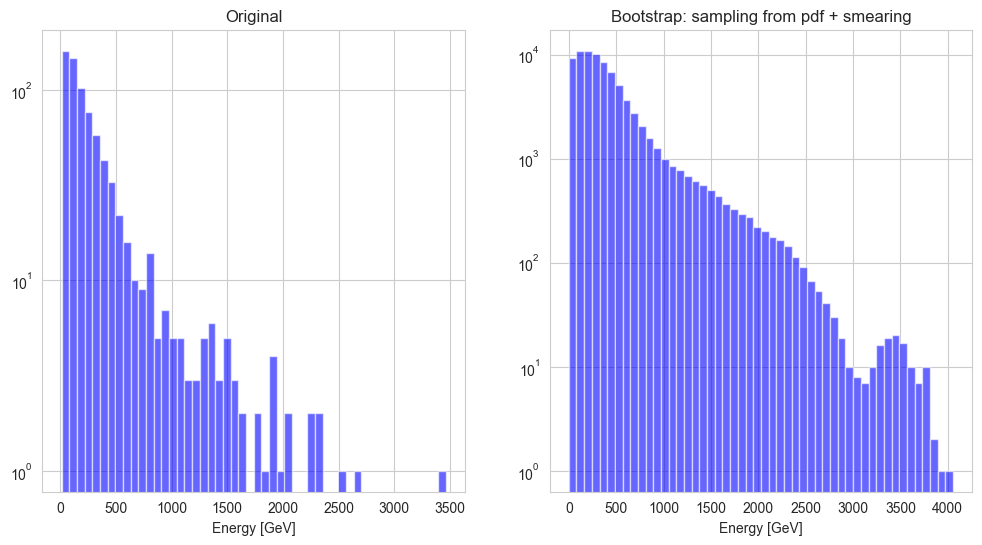

In [74]:
from scipy.stats import gaussian_kde
sns.set_style("whitegrid")
# Assuming `nutau` is your original data
# Example: nutau = np.array([...])

# Plot the PDF using seaborn (just for visualization)
sns.kdeplot(x=nutau, bw_adjust=0.5)
plt.title('PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.savefig("pdf.pdf")
plt.show()

# Fit a Gaussian KDE to your data
kde = gaussian_kde(nutau, bw_method=0.5)  # bw_method is equivalent to bw_adjust in seaborn

# Generate samples from the fitted KDE (i.e., from the PDF)
num_samples = 100000  # Number of samples you want to generate
samples = kde.resample(num_samples)

# Convert the samples to a 1D array
samples = samples.flatten()

threshold = 1000  # Example threshold, change as needed
tail_indices = np.where(samples > threshold)[0]
samples[tail_indices] = np.random.normal(samples[tail_indices], np.sqrt(samples[tail_indices]), size=len(tail_indices))
samples = np.array(samples)


# Plot the sampled data for comparison
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].hist(nutau, bins=50, alpha=0.6, color='blue')
ax[0].set_yscale("log")
ax[0].set_title("Original")
ax[0].set_xlabel('Energy [GeV]')
ax[1].hist(samples[samples > 0], bins=50, alpha=0.6, color='blue')
ax[1].set_yscale("log")
ax[1].set_title("Bootstrap: sampling from pdf + smearing")
ax[1].set_xlabel('Energy [GeV]')


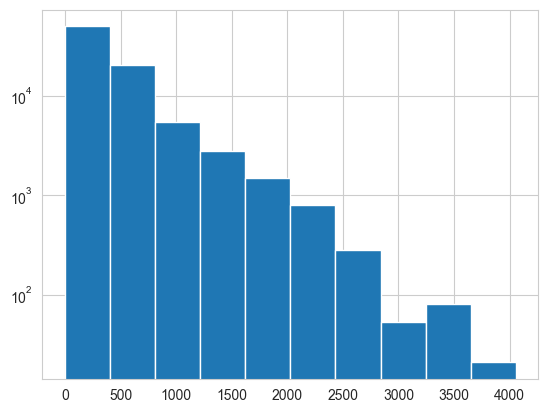

In [78]:
plt.hist(samples[samples > 0])
plt.yscale("log")

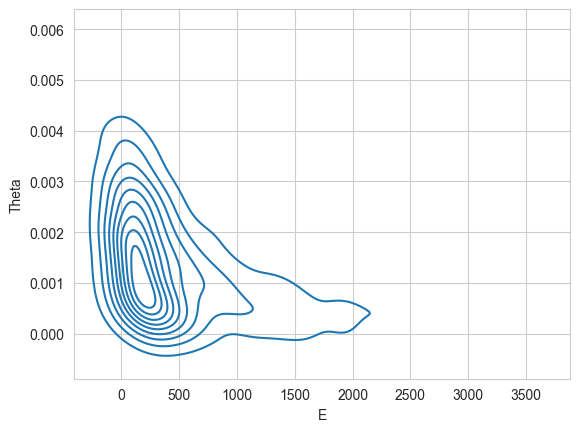

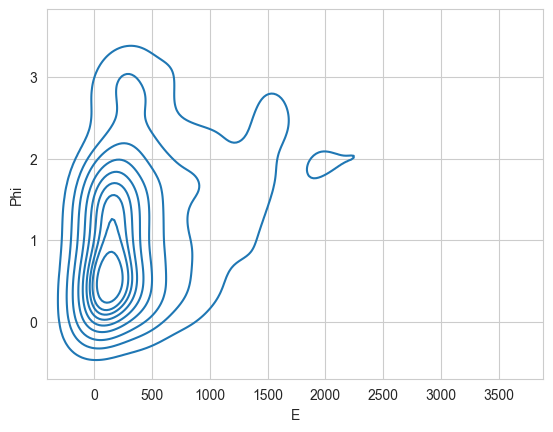

In [38]:
df["Theta"] = np.arccos(df["pz"]/df["E"])
df["Phi"] = np.arccos(df["py"]/np.sqrt(df["px"]**2 + df["py"]**2))
sns.kdeplot(data = df, x = "E", y = "Theta")
plt.show()
sns.kdeplot(data = df, x = "E", y = "Phi")
plt.show()

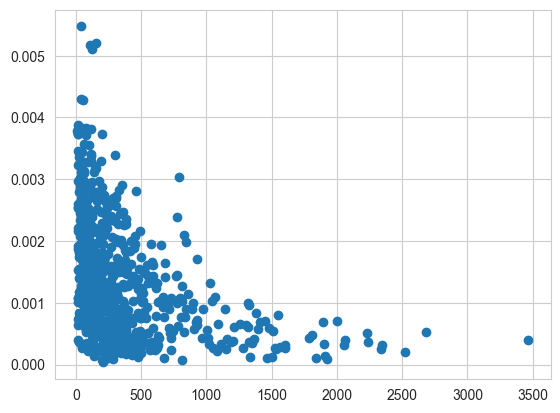

In [42]:
plt.scatter(df["E"], df["Theta"])

In [45]:
from scipy.stats import gaussian_kde
sns.set_style("whitegrid")
# Assuming `nutau` is your original data
# Example: nutau = np.array([...])

# Plot the PDF using seaborn (just for visualization)
sns.kdeplot(x=nutau, bw_adjust=0.5)
plt.title('PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.savefig("pdf.pdf")
plt.show()

# Fit a Gaussian KDE to your data
kde = gaussian_kde(df[["E", "Theta"]].T, bw_method=0.5)  # bw_method is equivalent to bw_adjust in seaborn

# Generate samples from the fitted KDE (i.e., from the PDF)
num_samples = 100000  # Number of samples you want to generate
samples = pd.DataFrame(kde.resample(num_samples).T)
samples.columns = df.columns
# Convert the samples to a 1D array
#samples = samples.flatten()

threshold = 1000  # Example threshold, change as needed
tail_indices = np.where(samples > threshold)[0]
samples[tail_indices] = np.random.normal(samples[tail_indices], np.sqrt(samples[tail_indices]), size=len(tail_indices))
samples = np.array(samples)
pd.

# Plot the sampled data for comparison
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].hist(nutau, bins=50, alpha=0.6, color='blue')
ax[0].set_yscale("log")
ax[0].set_title("Original")
ax[0].set_xlabel('Energy [GeV]')
ax[1].hist(samples[samples > 0], bins=50, alpha=0.6, color='blue')
ax[1].set_yscale("log")
ax[1].set_title("Bootstrap: sampling from pdf + smearing")
ax[1].set_xlabel('Energy [GeV]')

# Plot the sampled data for comparison
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].hist(df["Theta"], bins=50, alpha=0.6, color='blue')
ax[0].set_yscale("log")
ax[0].set_title("Original")
ax[0].set_xlabel('Energy [GeV]')
ax[1].hist([samples > 0], bins=50, alpha=0.6, color='blue')
ax[1].set_yscale("log")
ax[1].set_title("Bootstrap: sampling from pdf + smearing")
ax[1].set_xlabel('Energy [GeV]')


array([[ 4.56541076e-01, -5.62653766e-01,  7.67783871e-02,
        -2.61572153e-01,  1.68785191e+00, -3.19400864e-01,
         1.01596432e-01, -3.22229355e-01, -2.68500202e-01,
         6.94817644e-01],
       [ 6.37345149e-01,  4.90624974e-01, -5.03984851e-02,
         5.28423003e-01, -3.21212047e-01,  2.23735988e-01,
         2.04467880e-01,  1.48496184e-01, -2.99992819e-01,
         2.45280797e-02],
       [ 2.67105570e+02,  1.92215305e+02, -9.93893749e+01,
         2.63242937e+02,  5.35450237e+02,  3.36656795e+02,
         5.18540920e+02, -1.05199935e+02, -2.72434307e+01,
         2.36432282e+02],
       [ 2.67106443e+02,  1.92217173e+02, -9.93892673e+01,
         2.63243977e+02,  5.35452305e+02,  3.36657290e+02,
         5.18540855e+02, -1.05199709e+02, -2.72433473e+01,
         2.36432800e+02],
       [ 2.39547676e+01, -2.25810013e+01,  2.07943687e+01,
        -1.13291765e+01, -9.69485165e+00, -2.44150969e+01,
        -1.61963798e+01,  3.60462618e+00, -4.32534002e+00,
        -4.

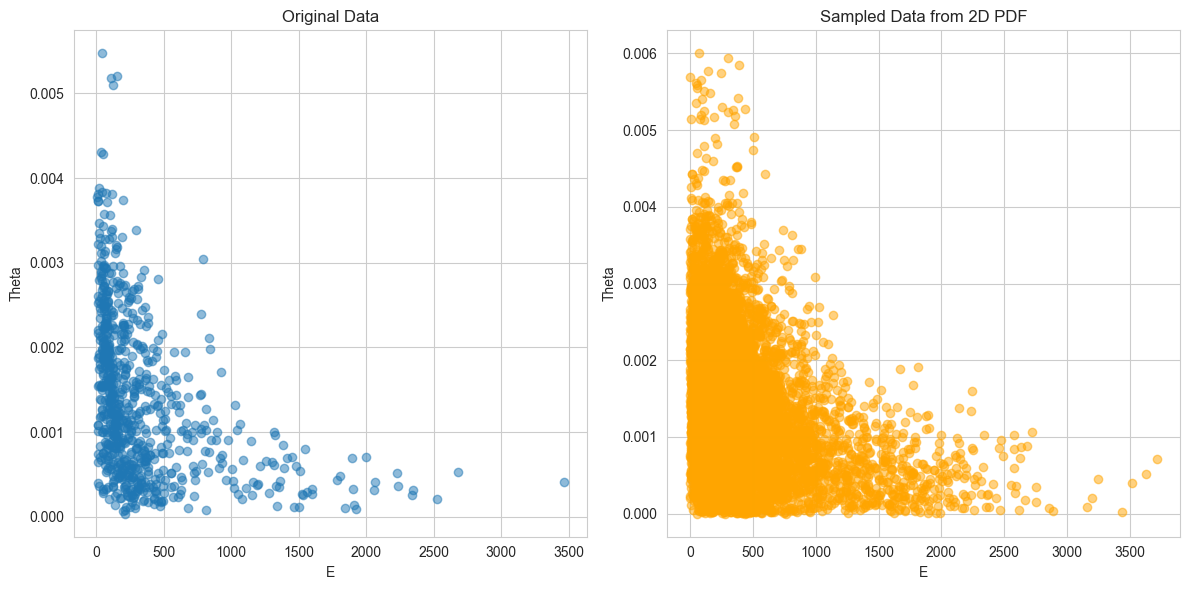

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming your data is in a pandas DataFrame called `df` with columns "E" and "Theta"
# Example:
# df = pd.DataFrame({
#     "E": np.random.randn(1000), 
#     "Theta": np.random.uniform(-np.pi, np.pi, 1000)
# })

# Extract the columns "E" and "Theta"
data = df[["E", "Theta"]].values.T  # Transpose to shape (2, N) for gaussian_kde

# Fit a 2D KDE using gaussian_kde
kde = gaussian_kde(data, bw_method=0.5)  # bw_method can be adjusted for smoothness

# Sample new data points from the joint PDF
num_samples = 10000  # Number of samples to generate
samples = kde.resample(num_samples)

# Convert samples to DataFrame for easier handling and visualization
sampled_df = pd.DataFrame({
    "E": samples[0],
    "Theta": samples[1]
})

# Plot the original data and sampled data for comparison
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(df["E"], df["Theta"], alpha=0.5)
plt.title('Original Data')
plt.xlabel('E')
plt.ylabel('Theta')

# Sampled data plot
plt.subplot(1, 2, 2)
sampled_df = sampled_df.loc[(sampled_df["E"] > 0) & (sampled_df["Theta"] > 0)]
plt.scatter(sampled_df["E"], sampled_df["Theta"], alpha=0.5, color='orange')
plt.title('Sampled Data from 2D PDF')
plt.xlabel('E')
plt.ylabel('Theta')

plt.tight_layout()
plt.show()

# Save sampled data if needed
# sampled_df.to_csv("sampled_data.csv", index=False)


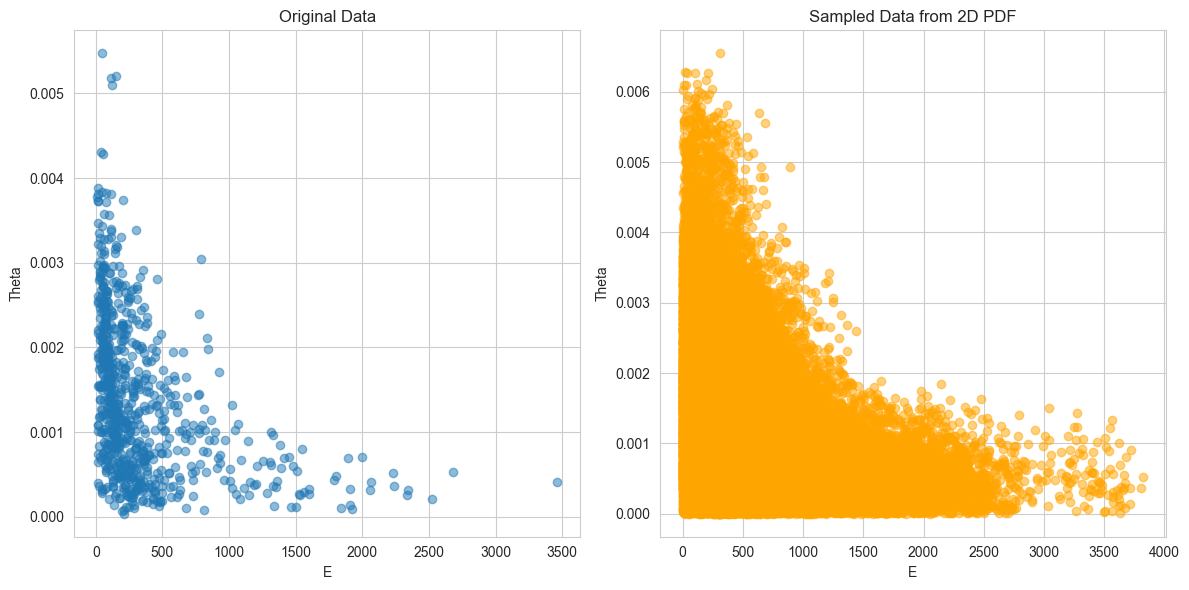

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called `df` with columns "E" and "Theta"
# Example:
# df = pd.DataFrame({
#     "E": np.random.randn(1000) + 5, 
#     "Theta": np.random.uniform(-np.pi, np.pi, 1000)
# })

# Extract the columns "E" and "Theta"
data = df[["E", "Theta"]].values.T  # Transpose to shape (2, N) for gaussian_kde

# Fit a 2D KDE using gaussian_kde
from scipy.stats import gaussian_kde
kde = gaussian_kde(data, bw_method=0.5)  # bw_method can be adjusted for smoothness

# Sample new data points from the joint PDF
num_samples = 100000  # Number of samples to generate
samples = kde.resample(num_samples)

# Convert samples to DataFrame
sampled_df = pd.DataFrame({
    "E": samples[0],
    "Theta": samples[1]
})

# Add Gaussian noise N(E, sqrt(E)) for E and N(Theta, sqrt(Theta)) for Theta
sampled_df["E_noisy"] = np.random.normal(sampled_df["E"], np.sqrt(np.abs(sampled_df["E"])))
#sampled_df["Theta_noisy"] = np.random.normal(sampled_df["Theta"], np.sqrt(np.abs(sampled_df["Theta"])))
sampled_df["Theta_noisy"] = sampled_df["Theta"]
# Plot the original data and sampled data for comparison
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(df["E"], df["Theta"], alpha=0.5)
plt.title('Original Data')
plt.xlabel('E')
plt.ylabel('Theta')

# Sampled data plot
plt.subplot(1, 2, 2)
sampled_df = sampled_df.loc[(sampled_df["E_noisy"] > 0) & (sampled_df["Theta_noisy"] > 0)]
plt.scatter(sampled_df["E_noisy"], sampled_df["Theta_noisy"], alpha=0.5, color='orange')
plt.title('Sampled Data from 2D PDF')
plt.xlabel('E')
plt.ylabel('Theta')

plt.tight_layout()
plt.show()

# Save sampled data if needed
# sampled_df.to_csv("sampled_data_with_noise.csv", index=False)


In [64]:
sampled_df = sampled_df[["E_noisy", "Theta_noisy"]]
sampled_df = sampled_df.rename(columns={"E_noisy": "E", "Theta_noisy": "Theta"})
sampled_df

,E,Theta
0,660.648616,0.000585
3,914.538372,0.000310
5,419.381016,0.001246
6,433.896008,0.000768
7,660.986433,0.002195
...,...,...
99994,89.164880,0.000791
99995,176.144604,0.002380
99996,248.008381,0.001817
99998,60.496222,0.004923


In [67]:
# Function to generate random px, py, and calculate pz
def generate_momentum_components(df):
    P = df["E"]
    Theta = df["Theta"]
    
    # Generate random angles for px and py in transverse plane
    phi = np.random.uniform(0, 2 * np.pi, len(df))  # Random angle in transverse plane
    
    # Calculate px and py based on the magnitude P and angle Theta
    px = P * np.sin(Theta) * np.cos(phi)
    py = P * np.sin(Theta) * np.sin(phi)
    
    # Calculate pz based on the zenith angle Theta
    pz = P * np.cos(Theta)
    
    # Add the new columns to the dataframe
    df["px"] = px
    df["py"] = py
    df["pz"] = pz
    
    return df


# Generate the px, py, pz columns
sampled_df_full = generate_momentum_components(sampled_df).drop(columns="Theta")
sampled_df_full["pdg"] = 16
sampled_df_full

,E,px,py,pz,pdg
0,660.648616,0.377623,-0.081358,660.648503,16
3,914.538372,-0.213159,0.186625,914.538328,16
5,419.381016,0.432734,-0.293147,419.380690,16
6,433.896008,0.183553,0.278172,433.895880,16
7,660.986433,-0.880301,-1.153193,660.984841,16
...,...,...,...,...,...
99994,89.164880,-0.062228,-0.033265,89.164852,16
99995,176.144604,0.287469,0.305159,176.144106,16
99996,248.008381,-0.233555,0.385399,248.007972,16
99998,60.496222,0.201666,-0.219145,60.495489,16


In [69]:
ak.Array(sampled_df_full)

<Array ['E', 'px', 'py', 'pz', 'pdg'] type='5 * string'>

In [73]:
import uproot
import awkward as ak
# Convert DataFrame back to awkward array (since uproot writes in this format)

# Define the structure of the new ROOT file
with uproot.recreate("nutau_flux.root") as new_file:
    # Writing the tree with the same structure as the original
    new_file["flux"] = {
        f"entry/{param}": sampled_df_full[param].to_numpy() for param in sampled_df_full.columns
    }

print("Data saved to new_file.root")

Data saved to new_file.root
